# Диагностика и кривые обучения

In [ ]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.feature_extraction import text

# train-test
from sklearn.model_selection import train_test_split

# methods
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import learning_curve

# датасет
from sklearn.datasets import load_breast_cancer

# 1 Загрузите датасет breast_cancer.

In [ ]:
breast_cancer = load_breast_cancer()

# 2 Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [ ]:
X = breast_cancer.data[:, :2]
Y = breast_cancer.target

# 3 Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [ ]:
classificator_1 = svm.SVC(C=0.01, kernel='rbf')
classificator_1.fit(X_train, Y_train)

SVC(C=0.01)

In [ ]:
classificator_1.score(X_train, Y_train)

0.7318681318681318

In [ ]:
classificator_1.score(X_test, Y_test)

0.7456140350877193

Если тестовая точность близка к обучающей, это скорее всего означает, что модель недообучается и при использовании более сложных моделей (или при снижении регуляризации, что эффективно то же самое) есть надежда улучшить данный показатель.

Если тестовая точность значительно ниже обучающей, это свидетельствует о потенциальном переобучении и потере способности к переобучению. Тогда для совершенствования модели нужно действовать в обратном направлении: использовать более простые модели или увеличивать регуляризацию данной.

Если же тестовая точность выше обучающей, это говорит о наличии случайных ошибок выборки тестовой модели. Такие ошибки неизбежно присутствуют и могут зашумлять результаты диагностики. Поэтому чаще всего для таких работ производится перекрестная проверка, которую мы будем проходить позже.

# Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
### собрать больше объектов наблюдения;
### провести обучение на меньшем объеме данных;
### исключить часть признаков из модели;
### добавить новые признаки в модель;
### добавить полиномиальные признаки;
### попробовать более сложные модели;
### попробовать более простые модели;
### увеличить регуляризацию модели;
### уменьшить регуляризацию модели;

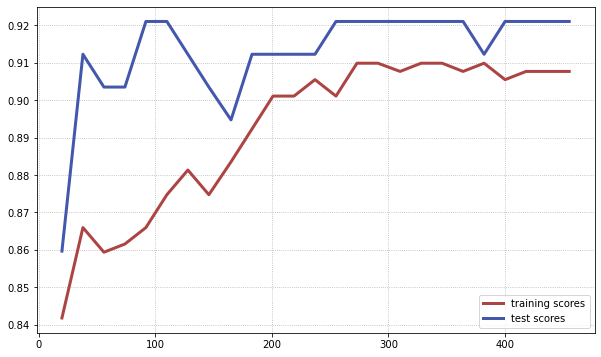

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 25):
    classificator_1 = svm.SVC(kernel='rbf')
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(numbers, training_scores, label="training scores", color='#AD4444', lw=3)
plt.plot(numbers, test_scores, label="test scores", color='#4357AD', lw=3)
plt.legend(loc="best")
plt.show()

в общем случае, увеличение объема данных приводит и к более точным моделям и облегчает их анализ.

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='linear'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'svc: poly kernel': svm.SVC(kernel='poly'),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def learning_curve_plot(n, method):
    training_scores = []
    test_scores = []
    numbers = []

    for i in np.linspace(20, len(X_train), 25):
        classificator_1 = methods[method]
        X = X_train[:int(i)]
        Y = Y_train[:int(i)]
        classificator_1.fit(X, Y)
        numbers.append(int(i))
        training_scores.append(classificator_1.score(X_train, Y_train))
        test_scores.append(classificator_1.score(X_test, Y_test))

    train_score = classificator_1.score(X_train, Y_train)
    test_score = classificator_1.score(X_test, Y_test)

    ax[n//3][n%3].plot(numbers, training_scores, label=f"training scores (score={np.round(train_score,3)})", color='#AD4444', lw=3)
    ax[n//3][n%3].plot(numbers, test_scores, label=f"test scores (score={np.round(test_score,3)})", color='#4357AD', lw=3)
    ax[n//3][n%3].set_title(f"{str.capitalize(method)}")
    ax[n//3][n%3].legend(loc="best")

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

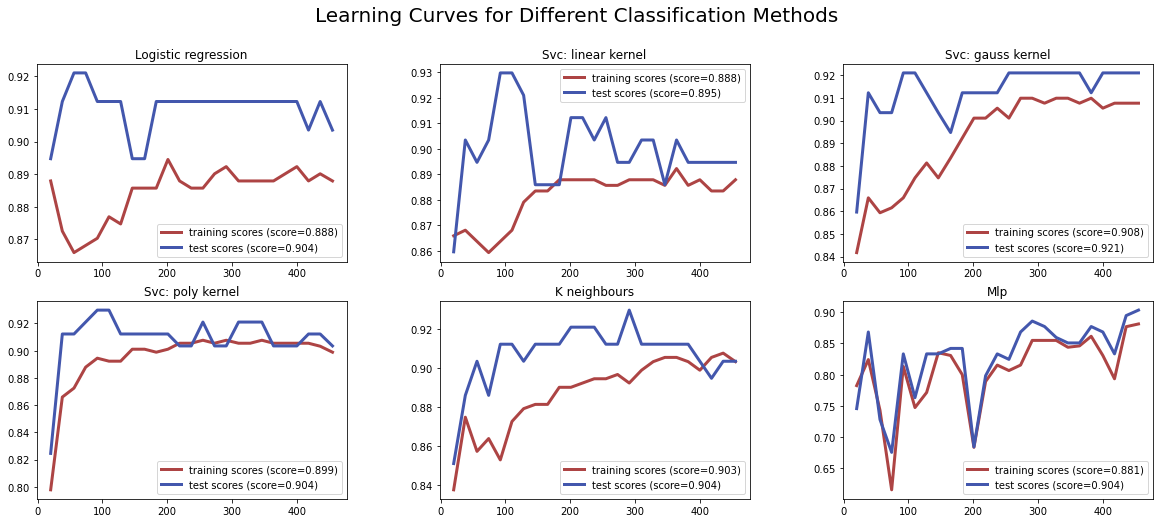

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different Classification Methods', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
    learning_curve_plot(i, method)

# 7 Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C=0.0001),
          'svc: gauss kernel C2': svm.SVC(C=0.01),
          'svc: gauss kernel C3': svm.SVC(C=1),
          'svc: gauss kernel C4': svm.SVC(C=100),
          'svc: gauss kernel C5': svm.SVC(C=10000),
          'svc: gauss kernel C6': svm.SVC(C=1000000)}

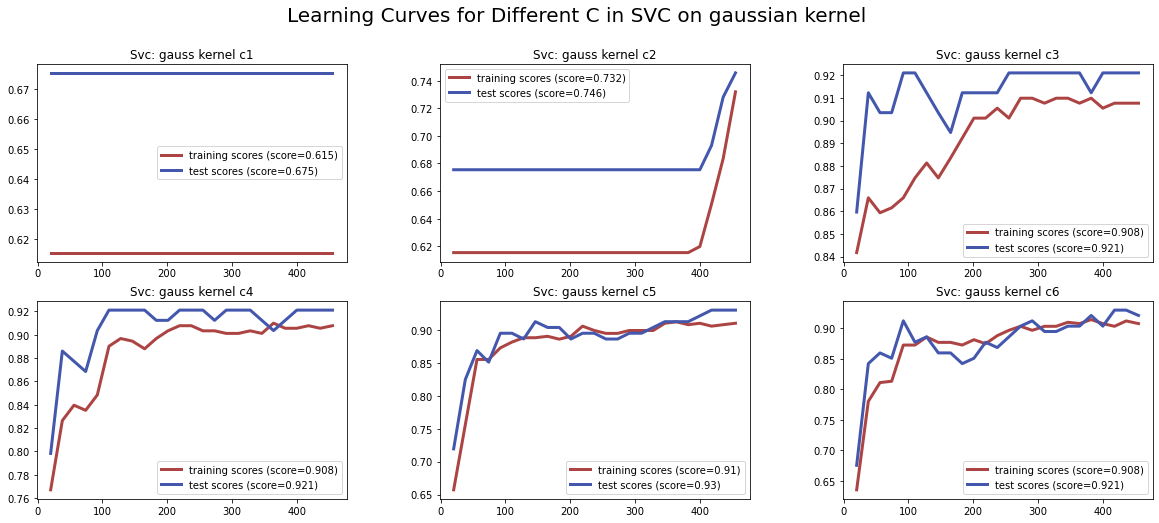

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
    learning_curve_plot(i, method)

# 8 Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

# 9 Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C=950000),
           'svc: gauss kernel C2': svm.SVC(C=980000),
           'svc: gauss kernel C3': svm.SVC(C=995000),
           'svc: gauss kernel C4': svm.SVC(C=1000000),
           'svc: gauss kernel C5': svm.SVC(C=1050000),
           'svc: gauss kernel C6': svm.SVC(C=1100000)}

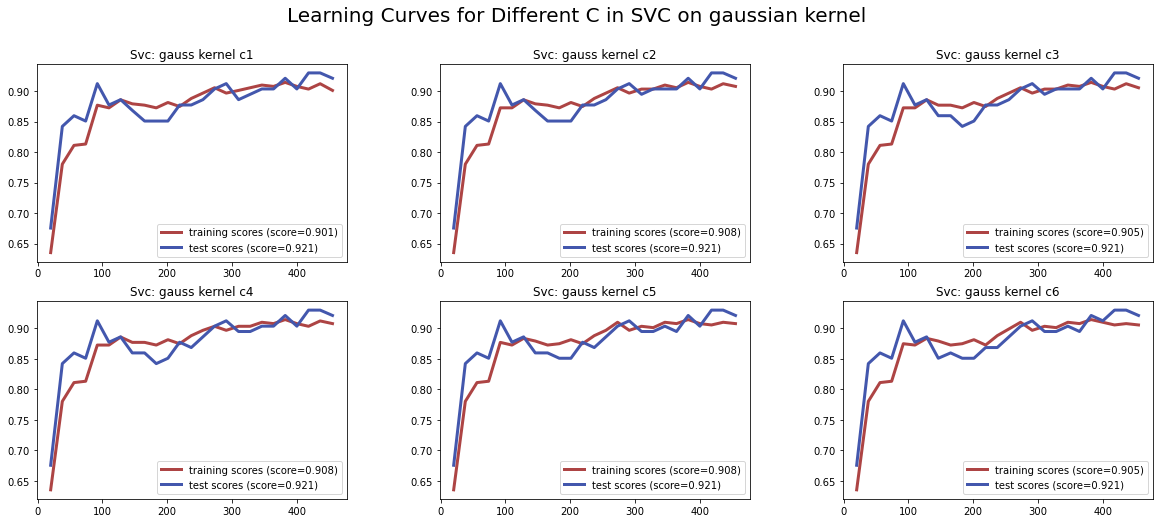

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
    learning_curve_plot(i, method)

чем больше C, тем больше точность

# 10 Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C=0.0001, kernel='linear'),
           'svc: linear kernel C2': svm.SVC(C=0.01, kernel='linear'),
           'svc: linear kernel C3': svm.SVC(C=1, kernel='linear'),
           'svc: linear kernel C4': svm.SVC(C=100, kernel='linear'),
           'svc: linear kernel C5': svm.SVC(C=10000, kernel='linear'),
           'svc: linear kernel C6': svm.SVC(C=1000000, kernel='linear')}

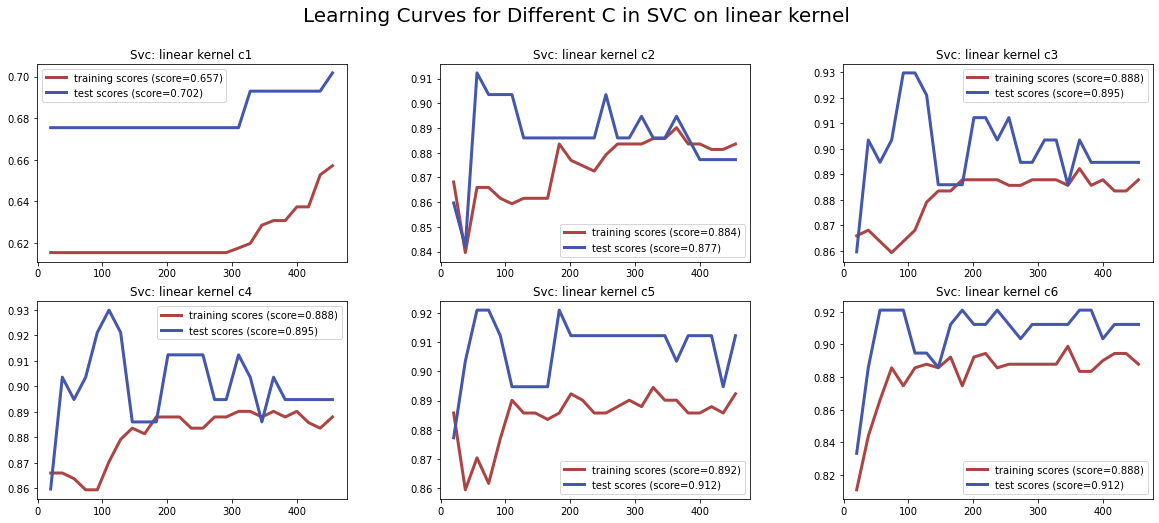

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on linear kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
    learning_curve_plot(i, method)

# Дополнительные задания

# 1 Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.

In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C=10, kernel='poly', degree=3),
           'svc: linear kernel C2': svm.SVC(C=10, kernel='poly', degree=5),
           'svc: linear kernel C3': svm.SVC(C=12, kernel='poly', degree=3),
           'svc: linear kernel C4': svm.SVC(C=12, kernel='poly', degree=5),
           'svc: linear kernel C5': svm.SVC(C=50, kernel='poly', degree=3),
           'svc: linear kernel C6': svm.SVC(C=50, kernel='poly', degree=5)}

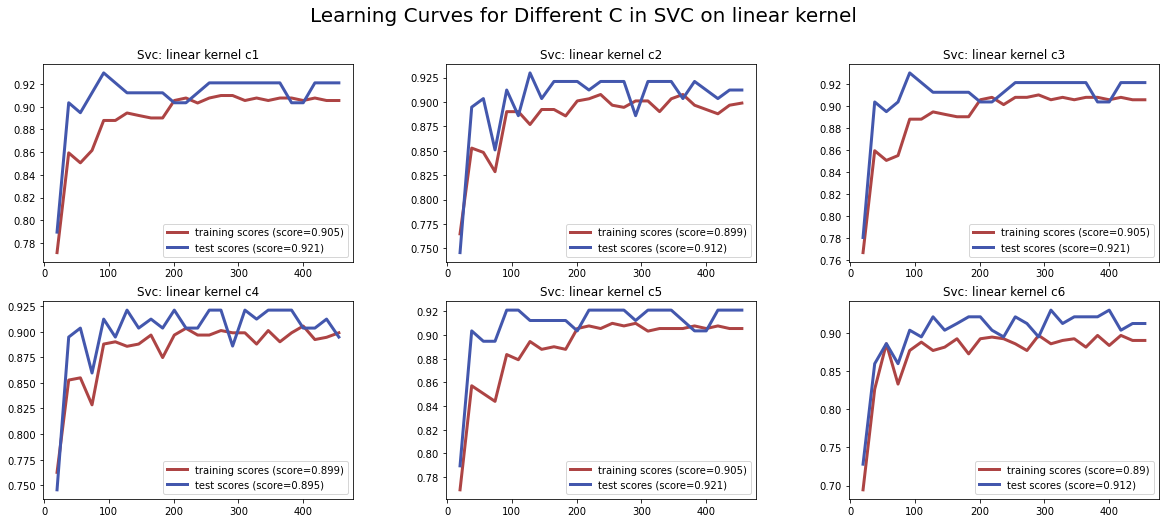

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on linear kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
    learning_curve_plot(i, method)

# 2 Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.

# 3 Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

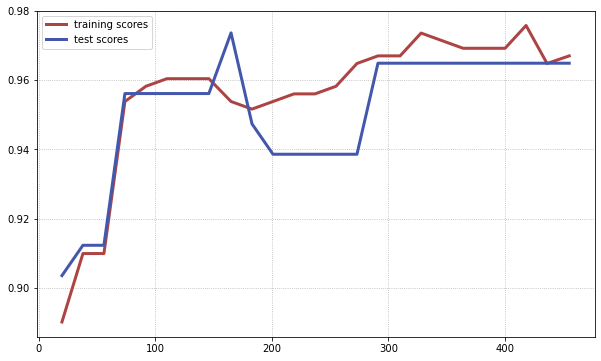

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 25):
    classificator_1 = svm.SVC(C=10000, kernel='linear')
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(numbers, training_scores, label="training scores", color='#AD4444', lw=3)
plt.plot(numbers, test_scores, label="test scores", color='#4357AD', lw=3)
plt.legend(loc="best")
plt.show()

Контрольные вопросы

1) Как влияет параметр С на степень регуляризации моделей классификации?

C (параметр регуляризации) – мера степени наказания Модель (Model) за каждую неверно классифицированную точку. Большое значение C приводит к тому, что из всех возможных гиперплоскостей будет иметь приоритет тот, что совершил наименьшее количество классификационных ошибок. Низкое значение C, наоборот, выберет такую разделительную границу, что хорошо разделяет точки, допуская некоторую погрешность.

2) Что показывает соотношение точности (ошибки) на тестовой и обучающей выборке?

Mean absolute sqaled error \
Средняя абсолютная квадратичная ошибка

3) Чем характеризуется ситуация недообучения? Как ее распознать на кривых обучения? А переобучение?

Если тестовая точность близка к обучающей, это скорее всего означает, что модель недообучается. Если тестовая точность значительно ниже обучающей, это свидетельствует о потенциальном переобучении и потере способности к переобучению.

4) Каковы рекомендации по улучшению точности модели в случае недообучения? А переобучения?

Модель недообучается: есть надежда улучшить данный показатель при использовании более сложных моделей / или при снижении регуляризации. Потенциальное переобучение, потеря способности к переобучению: использовать более простые модели или увеличивать регуляризацию.